In [11]:
import pandas as pd
import numpy as np

In [4]:
from google.colab  import files
uploaded= files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (2).csv


In [5]:
df=pd.read_csv('Churn_Modelling.csv')

In [6]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

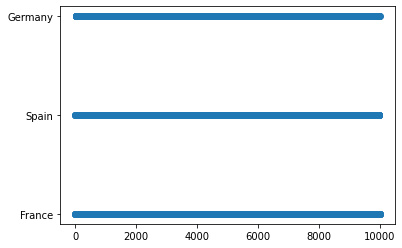

In [16]:
plt.scatter(df.index,df['Geography'])
plt.show()

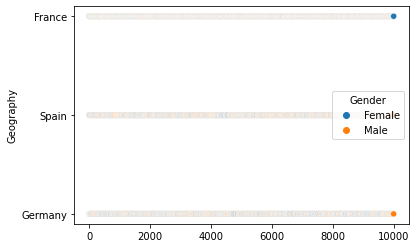

In [24]:
sns.scatterplot(x=df.index,y=df['Geography'],hue=df['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


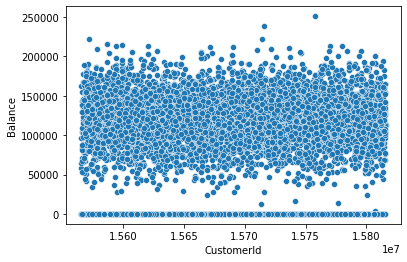

In [25]:
sns.scatterplot(df.CustomerId,df.Balance)
plt.show()

In [26]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [27]:
import statsmodels.api as sm
#define response variable
y = df['CreditScore']
#define explanatory variable
x = df[['EstimatedSalary']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            CreditScore   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01916
Date:                Sun, 16 Oct 2022   Prob (F-statistic):              0.890
Time:                        14:44:09   Log-Likelihood:                -59900.
No. Observations:               10000   AIC:                         1.198e+05
Df Residuals:                    9998   BIC:                         1.198e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             650.7617      1.940    3

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<Figure size 288x288 with 0 Axes>

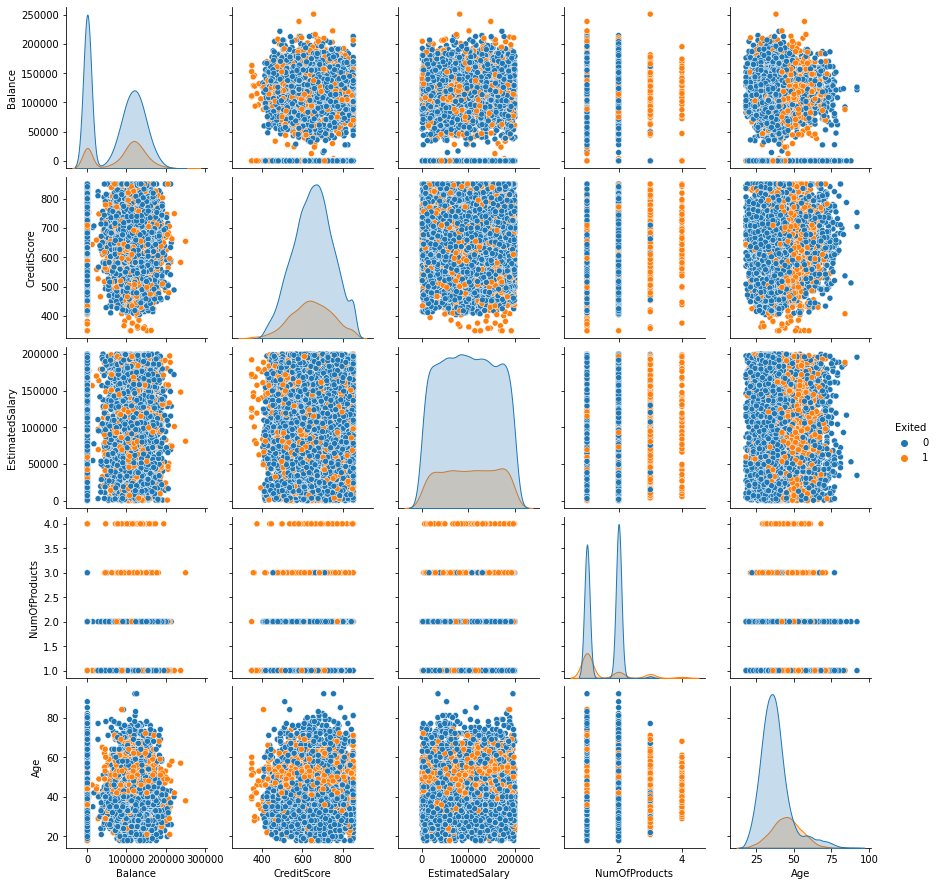

In [28]:
plt.figure(figsize=(4,4))
sns.pairplot(data=df[["Balance","CreditScore","EstimatedSalary","NumOfProducts","Age","Exited"]],hue="Exited")

In [29]:
df=pd.DataFrame(df)
print(df.sum())

RowNumber                                                   50005000
CustomerId                                              156909405694
Surname            HargraveHillOnioBoniMitchellChuBartlettObinnaH...
CreditScore                                                  6505288
Geography          FranceSpainFranceFranceSpainSpainFranceGermany...
Gender             FemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMa...
Age                                                           389218
Tenure                                                         50128
Balance                                                 764858892.88
NumOfProducts                                                  15302
HasCrCard                                                       7055
IsActiveMember                                                  5151
EstimatedSalary                                        1000902398.81
Exited                                                          2037
dtype: object


In [30]:
print("----Sum Value-----")
print(df.sum(1))
print("----------------------------------")
print("-----Product Value-----")
print(df.prod())
print("----------------------------------")
print(df.mean())
print("-------------------------------")
print("----------Median Value---------")
print(df.median())
print("-------------------------------")
print("----------Mode Value------------")
print(df.mode())
print("-------------------------------")

----Sum Value-----
0       15736618.88
1       15844315.44
2       15893456.37
3       15795925.63
4       15943385.92
           ...     
9995    15713313.64
9996    15739522.38
9997    15637370.58
9998    15861138.83
9999    15807478.57
Length: 10000, dtype: float64
----------------------------------
-----Product Value-----
RowNumber          0.0
CustomerId         0.0
CreditScore        0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    inf
Exited             0.0
dtype: float64
----------------------------------
RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64
--

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before ca

In [31]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
df.notnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9996,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9997,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9998,True,True,True,True,True,True,True,True,True,True,True,True,True,True


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


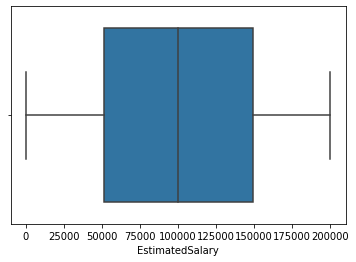

In [33]:
sns.boxplot(df['EstimatedSalary'])

In [34]:
from scipy import stats
z = np.abs(stats.zscore(df["CreditScore"]))
print(z)

0       0.326221
1       0.440036
2       1.536794
3       0.501521
4       2.063884
          ...   
9995    1.246488
9996    1.391939
9997    0.604988
9998    1.256835
9999    1.463771
Name: CreditScore, Length: 10000, dtype: float64


In [35]:
from sklearn.preprocessing import LabelEncoder
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [36]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [37]:
encoding=LabelEncoder()
df["Gender"]=encoding.fit_transform(df.iloc[:,1].values)
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France    2736   42   
1             2    15647311       Hill          608     Spain    3258   41   
2             3    15619304       Onio          502    France    2104   42   
3             4    15701354       Boni          699    France    5435   39   
4             5    15737888   Mitchell          850     Spain    6899   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    1599   39   
9996       9997    15569892  Johnstone          516    France     161   35   
9997       9998    15584532        Liu          709    France     717   36   
9998       9999    15682355  Sabbatini          772   Germany    4656   42   
9999      10000    15628319     Walker          792    France    2497   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [38]:
print("----------Dependent Variables----------")
X=df.iloc[:,1:4]
print(X)
print("---------------------------------------")
print("---------Independent Variables---------")
Y=df.iloc[:,4]
print(Y)
print("---------------------------------------")

----------Dependent Variables----------
      CustomerId    Surname  CreditScore
0       15634602   Hargrave          619
1       15647311       Hill          608
2       15619304       Onio          502
3       15701354       Boni          699
4       15737888   Mitchell          850
...          ...        ...          ...
9995    15606229   Obijiaku          771
9996    15569892  Johnstone          516
9997    15584532        Liu          709
9998    15682355  Sabbatini          772
9999    15628319     Walker          792

[10000 rows x 3 columns]
---------------------------------------
---------Independent Variables---------
0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object
---------------------------------------


In [39]:
from sklearn.model_selection import train_test_split
#Split the data into training & testing
x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size=4,random_state=4)
print(x_train)

      const  EstimatedSalary
2558    1.0        137903.54
7642    1.0        121765.00
8912    1.0        109470.34
3319    1.0          2923.61
6852    1.0          7312.25
...     ...              ...
456     1.0          7666.73
6017    1.0          9085.00
709     1.0        147794.63
8366    1.0        102515.42
1146    1.0         54776.64

[9996 rows x 2 columns]


In [40]:
print("-x_test-")
print(x_test)
print("-y_train-")
print(y_train)
print("-y_test-")
print(y_test)

-x_test-
      const  EstimatedSalary
1603    1.0         23305.85
8713    1.0         41248.80
4561    1.0        143317.42
6600    1.0        174123.16
-y_train-
2558    727
7642    811
8912    623
3319    430
6852    600
       ... 
456     733
6017    487
709     686
8366    637
1146    614
Name: CreditScore, Length: 9996, dtype: int64
-y_test-
1603    576
8713    786
4561    562
6600    505
Name: CreditScore, dtype: int64
